# Оглавление<a id="heading"></a>
1. [Описание проекта и условные обозначения](#1)
2. [Подготовка данных](#2)
  - [Открытие файлов](#2.1)    
  - [Анализ признаков, недоступных в тестовой выборке](#2.2)    
  - [Проверка эффективности обогащения](#2.3)
  - [Предобработка данных](#2.4)
3. [Анализ данных](#3)
  - [Анализ концентрации металлов на различных этапах очистки](#3.1)
  - [Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках](#3.2)
  - [Суммарная концентрация веществ на разных стадиях](#3.3)
4. [Построение модели](#4)
  - [Функция для вычисления итоговой sMAPE](#4.1)
  - [Обучение моделей и оценка их качества](#4.2)
5. [Вывод](#5)

# 1. Описание проекта и условные обозначения<a id='1'>
[Подготовка данных▼](#2) [Оглавление▲▲](#heading)    


# Описание проекта
Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Необходимо:

Подготовить данные;
Провести исследовательский анализ данных;
Построить и обучить модель.


# Условные обозначения

## Технологический процесс

Rougher feed — исходное сырье

Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

Xanthate — ксантогенат (промотер, или активатор флотации);

Sulphate — сульфат (на данном производстве сульфид натрия);

Depressant — депрессант (силикат натрия).

Rougher process (англ. «грубый процесс») — флотация

Rougher tails — отвальные хвосты

Float banks — флотационная установка

Cleaner process — очистка

Rougher Au — черновой концентрат золота

Final Au — финальный концентрат золота

## Параметры этапов

air amount — объём воздуха

fluid levels — уровень жидкости

feed size — размер гранул сырья

feed rate — скорость подачи

## Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

## Возможные значения для блока [этап]:

rougher — флотация

primary_cleaner — первичная очистка

secondary_cleaner — вторичная очистка

final — финальные характеристики

## Возможные значения для блока [тип_параметра]:

input — параметры сырья

output — параметры продукта

state — параметры, характеризующие текущее состояние этапа

calculation — расчётные характеристики

# 2. Подготовка данных<a id='2'>
[Открытие файлов▼](#2.1) [Оглавление▲▲](#heading)    


# Открытие файлов<a id='2.1'>
[Анализ признаков, недоступных в тестовой выборке▼](#2.2) [Оглавление▲▲](#heading)    


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
import warnings; warnings.filterwarnings(action='ignore')
pd.options.display.max_columns=100
pd.options.display.max_rows=100

try:
    full=pd.read_csv('C:/Users/ASUS/Desktop/практикум/модуль 2/сборный проект/gold_recovery_full.csv')
    train=pd.read_csv('C:/Users/ASUS/Desktop/практикум/модуль 2/сборный проект/gold_recovery_train.csv')
    test=pd.read_csv('C:/Users/ASUS/Desktop/практикум/модуль 2/сборный проект/gold_recovery_test.csv')
except:
    full=pd.read_csv('/datasets/gold_recovery_full.csv')
    train=pd.read_csv('/datasets/gold_recovery_train.csv')
    test=pd.read_csv('/datasets/gold_recovery_test.csv')
    
def open_file(data):
    display(data.head())
    print('\n\n')
    display(data.info())       
    print('\n\n')        
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')



open_file(full) 
open_file(train)
open_file(test)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant          

None




++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant          

None




++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher

None




++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


### Вывод: данные не самые качественные, много пропусков, в тест (по условию) не вошли столбцы, имеющиеся в обучающей выборке. 

# Анализ признаков, недоступных в тестовой выборке<a id='2.2'>
[Проверка эффективности обогащения▼](#2.3) [Оглавление▲▲](#heading)    

In [2]:
# выведем недоступные в тестовой выборке признаки 
train_column=train.columns
test_column=test.columns
defalt_columns=[]
for column in train_column:
    if not column in test_column:
        defalt_columns.append(column)
defalt_columns=pd.Series(defalt_columns)
display(defalt_columns)       

0                           final.output.concentrate_ag
1                           final.output.concentrate_pb
2                          final.output.concentrate_sol
3                           final.output.concentrate_au
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_pb
7                                 final.output.tail_sol
8                                  final.output.tail_au
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_pb
11               primary_cleaner.output.concentrate_sol
12                primary_cleaner.output.concentrate_au
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_pb
15                      primary_cleaner.output.tail_sol
16                       primary_cleaner.output.tail_au
17        rougher.calculation.sulfate_to_au_conc

### Вывод: в тестовой выборке отсутствуют 34 столбца. В основном это промежуточные результаты обогащения в сырье и хвостах, а также 4 настройки флотации.

# Проверка эффективности обогащения<a id='2.3'>
[Предобработка данных▼](#2.4) [Оглавление▲▲](#heading)

In [3]:
# выберем значения не равные 0, дабы избежать деления на него
train=train[train!=0]


# проверим правильность расчета эффктивности обогащения
def check_recovery(data):

    c=data['rougher.output.concentrate_au']
    f=data['rougher.input.feed_au']
    t=data['rougher.output.tail_au']
    check_recovery=(c*(f-t))/((f*(c-t)))*100
    
    return check_recovery


train['check_recovery']=train.apply(check_recovery, axis=1)
mae=(train['rougher.output.recovery']-train['check_recovery']).mean()
print(mae)

1.1948788219492627e-16


### Вывод: метрика MAE стремится к 0, значит recovery рассчитана верно.

# Предобработка данных<a id='2.4'>
[Анализ данных▼](#3) [Оглавление▲▲](#heading)    

In [4]:
# удалим пропуски в датасетах
train=train.dropna()
print(train.shape)

test=test.dropna()
print(test.shape)


full=full.dropna()
print(full.shape)

(10285, 88)
(5383, 53)
(16094, 87)


# 3. Анализ данных<a id='3'>
[Анализ концентрации металлов на различных этапах очистки▼](#3.1) [Оглавление▲▲](#heading)

# Анализ концентрации металлов на различных этапах очистки<a id='3.1'>
[Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках▼](#3.2) [Оглавление▲▲](#heading)

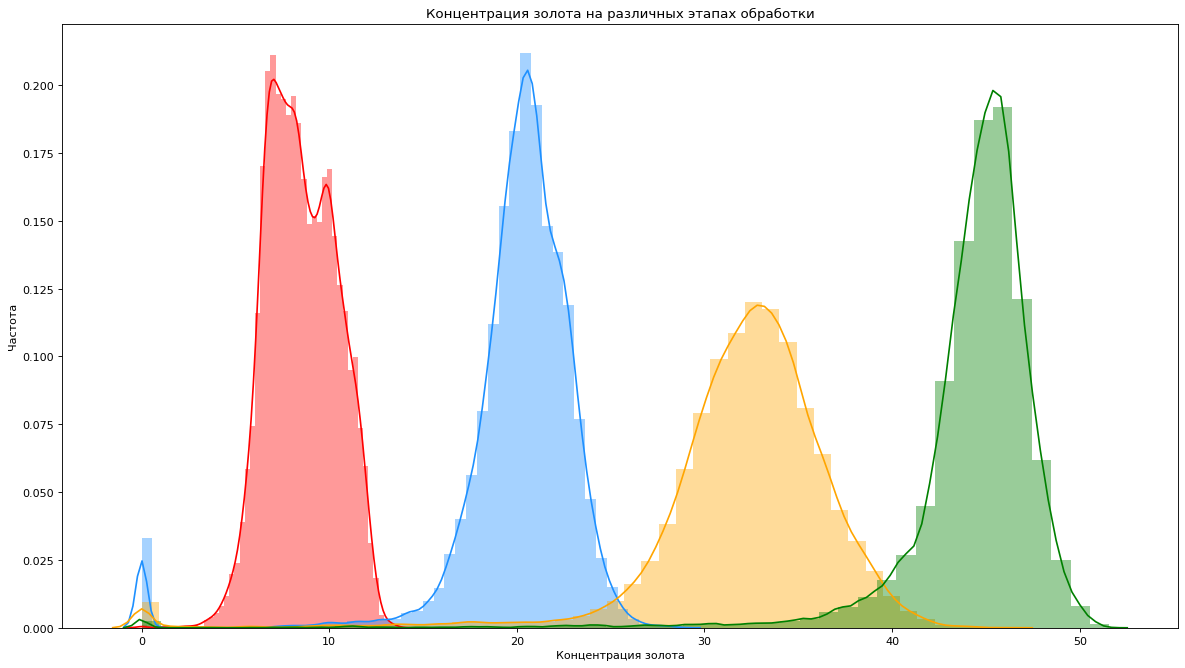

In [5]:
# выведем концентрацию золота на различных этапах 

plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(full['rougher.input.feed_au'], color="red")
sns.distplot(full['rougher.output.concentrate_au'], color="dodgerblue")
sns.distplot(full['primary_cleaner.output.concentrate_au'], color="orange")
sns.distplot(full['final.output.concentrate_au'], color="g")
plt.title('Концентрация золота на различных этапах обработки')
plt.xlabel('Концентрация золота')
plt.ylabel('Частота')
plt.show()

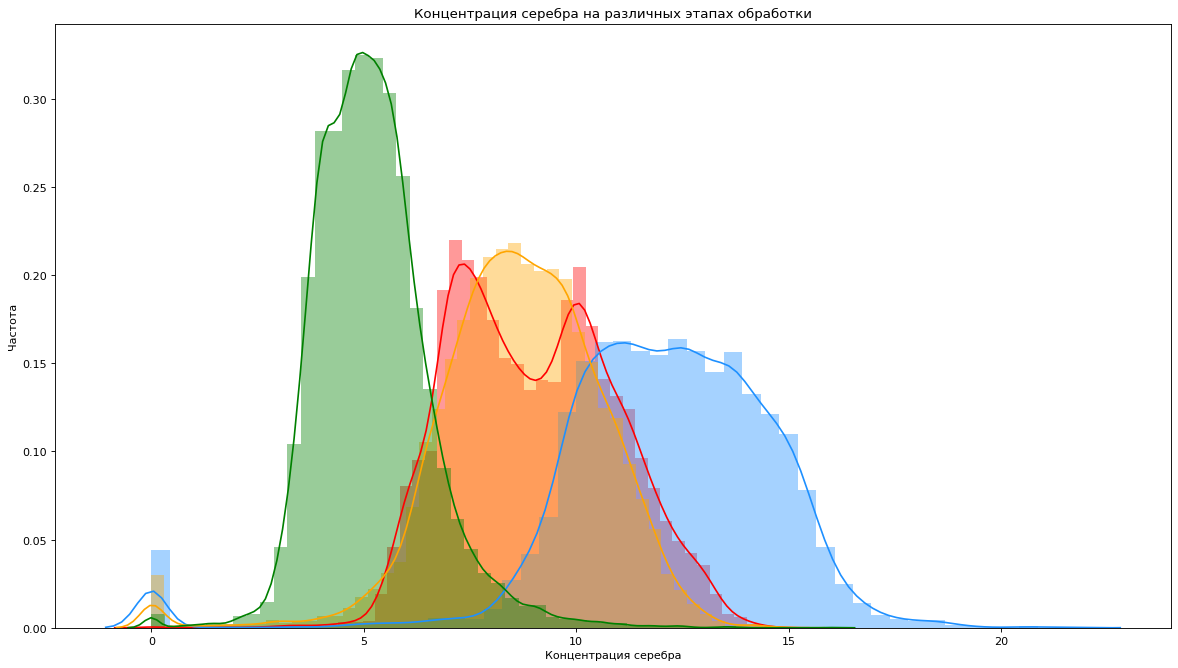

In [6]:
# выведем концентрацию серебра на различных этапах 

plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(full['rougher.input.feed_ag'], color="red")
sns.distplot(full['rougher.output.concentrate_ag'], color="dodgerblue")
sns.distplot(full['primary_cleaner.output.concentrate_ag'], color="orange")
sns.distplot(full['final.output.concentrate_ag'], color="g")
plt.title('Концентрация серебра на различных этапах обработки')
plt.xlabel('Концентрация серебра')
plt.ylabel('Частота')
plt.show()

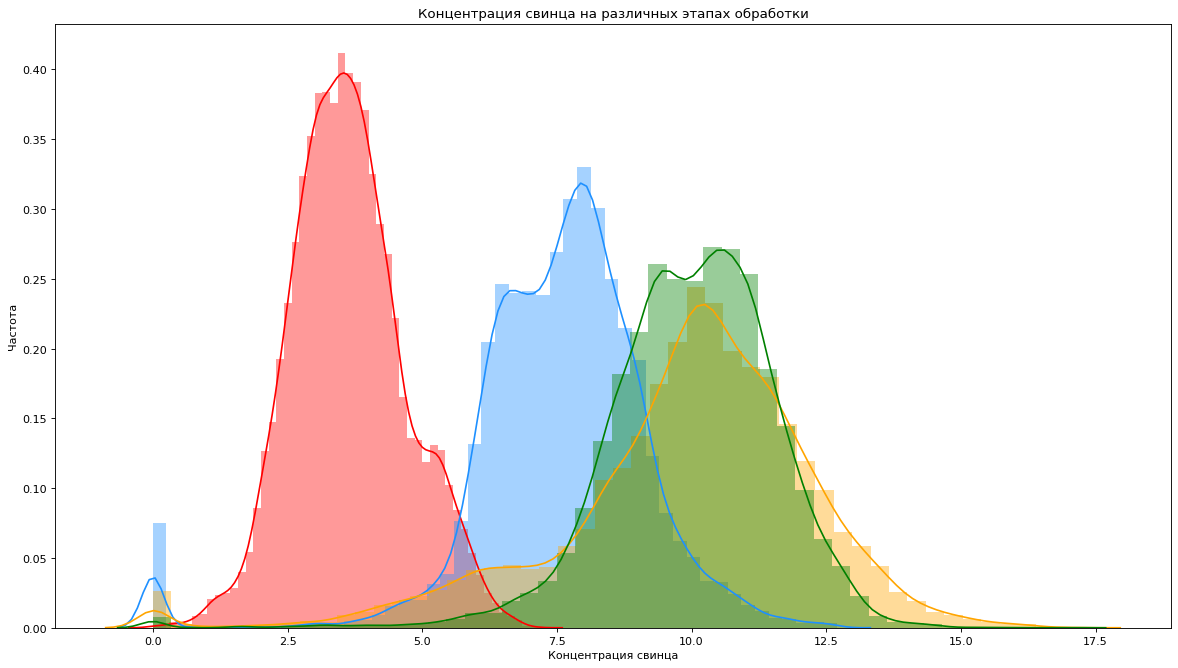

In [7]:
# выведем концентрацию свинца на различных этапах 

plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(full['rougher.input.feed_pb'], color="red")
sns.distplot(full['rougher.output.concentrate_pb'], color="dodgerblue")
sns.distplot(full['primary_cleaner.output.concentrate_pb'], color="orange")
sns.distplot(full['final.output.concentrate_pb'], color="g")
plt.title('Концентрация свинца на различных этапах обработки')
plt.xlabel('Концентрация свинца')
plt.ylabel('Частота')
plt.show()

### Вывод В целом концентрация веществ от этапа к этапу меняется, однако сильно бросаются в глаза выбросы около 0 по всем веществам и на всех этапах.

# Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках <a id='3.2'>
[Суммарная концентрация веществ на разных стадиях▼](#3.3) [Оглавление▲▲](#heading)   


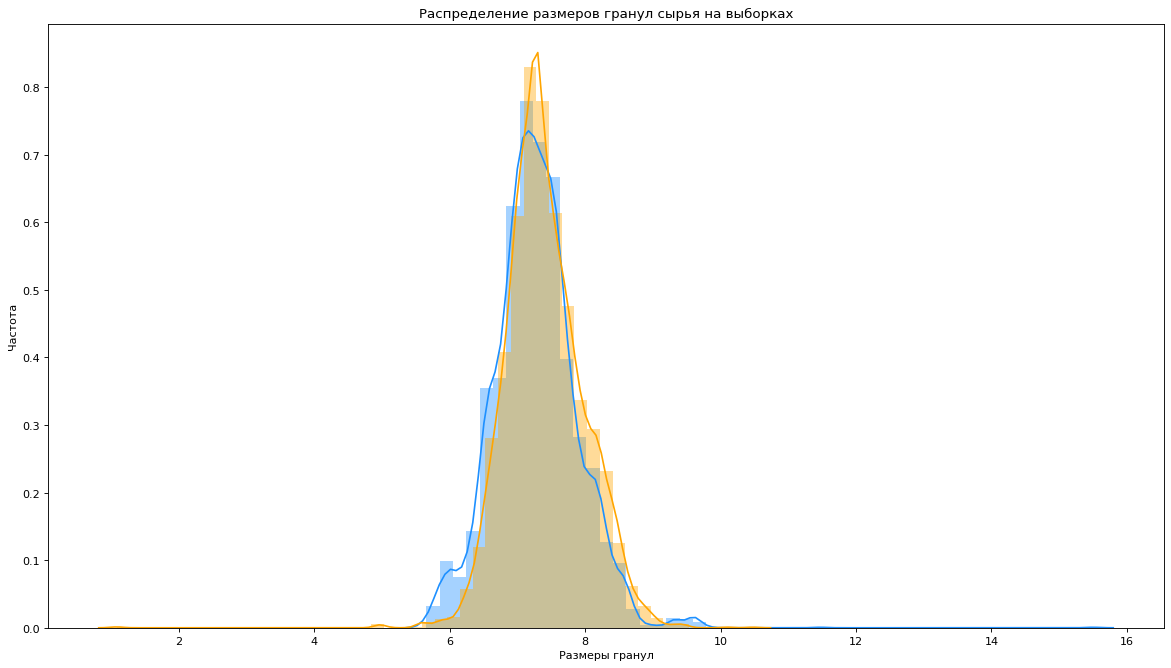

In [8]:
# сравним распределение размеров гранул сырья на тесте и обучающей выборке
plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(test['primary_cleaner.input.feed_size'], color="dodgerblue", label="primary_cleaner.input.feed_size")
sns.distplot(train['primary_cleaner.input.feed_size'], color="orange", label="primary_cleaner.input.feed_size")
plt.title('Распределение размеров гранул сырья на выборках')
plt.xlabel('Размеры гранул')
plt.ylabel('Частота')
plt.show()

### Вывод: распределение размеров гранул сырья практически одинаково на обоих выборках, что хорошо повлияет на предсказание модели.

# Суммарная концентрация веществ на разных стадиях<a id='3.3'>
[Построение модели▼](#4) [Оглавление▲▲](#heading)   


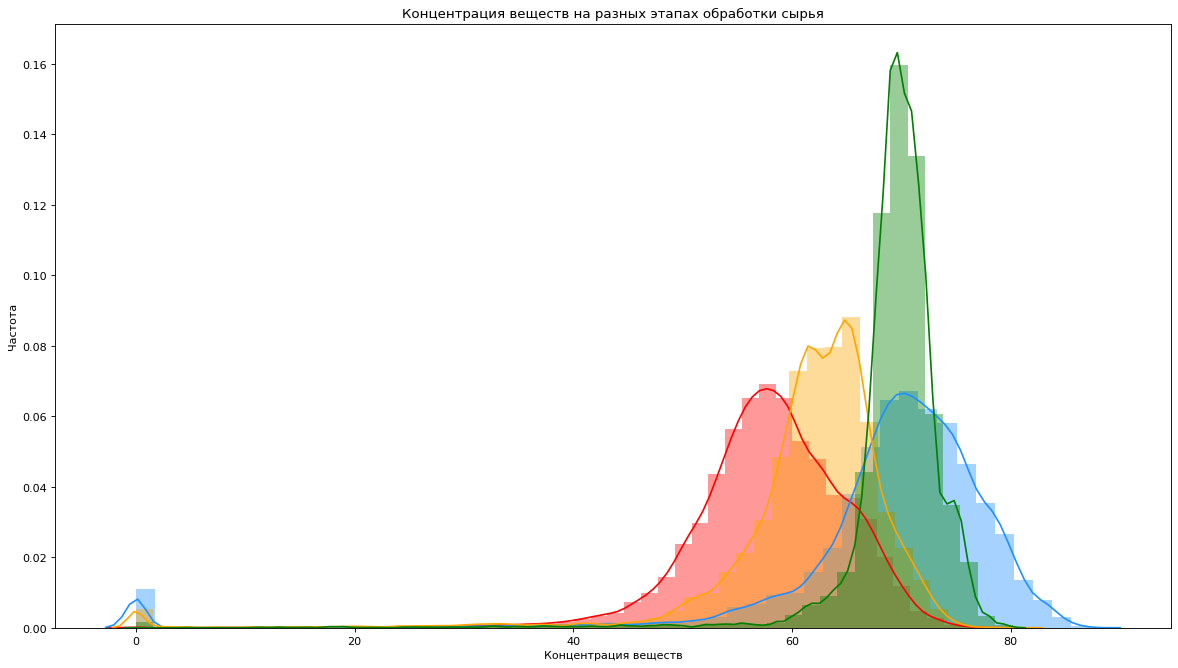

In [9]:
# Т.к. в тестовой выборке есть данные только по входящему сырью, пострoим 
# график распределения по полной выборке
sum_feed=(full['rougher.input.feed_pb']+
                            full['rougher.input.feed_au']+
                            full['rougher.input.feed_ag']+
                            full['rougher.input.feed_sol'])
sum_rougher=(full['rougher.output.concentrate_pb']+
                            full['rougher.output.concentrate_au']+
                            full['rougher.output.concentrate_ag']+
                            full['rougher.output.concentrate_sol'])
sum_primary_cleaner=(full['primary_cleaner.output.concentrate_pb']+
                            full['primary_cleaner.output.concentrate_au']+
                            full['primary_cleaner.output.concentrate_ag']+
                            full['primary_cleaner.output.concentrate_sol'])
sum_final=(full['final.output.concentrate_pb']+
                            full['final.output.concentrate_au']+
                            full['final.output.concentrate_ag']+
                            full['final.output.concentrate_sol'])                                 




plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(sum_feed, color="red")
sns.distplot(sum_rougher, color="dodgerblue", label="sum_rougher")
sns.distplot(sum_primary_cleaner, color="orange", label="sum_primary_cleaner")
sns.distplot(sum_final, color="g", label="sum_final")
plt.title('Концентрация веществ на разных этапах обработки сырья')
plt.xlabel('Концентрация веществ')
plt.ylabel('Частота')
plt.show()


In [10]:
# Т.к. мы уже строили графики концентрации au, ag и pb на предыдущем этапе
# то можем сразу удалить их аномалии
train=train.drop(train.index[train['rougher.input.feed_au']<3])
train=train.drop(train.index[train['rougher.output.concentrate_au']<3])
train=train.drop(train.index[train['primary_cleaner.output.concentrate_au']<3])
train=train.drop(train.index[train['final.output.concentrate_au']<3])


train=train.drop(train.index[train['rougher.input.feed_ag']<2.5])
train=train.drop(train.index[train['rougher.output.concentrate_ag']<2.5])
train=train.drop(train.index[train['primary_cleaner.output.concentrate_ag']<2.5])
train=train.drop(train.index[train['final.output.concentrate_ag']<2.5])


train=train.drop(train.index[train['rougher.input.feed_pb']<1])
train=train.drop(train.index[train['rougher.output.concentrate_pb']<1])
train=train.drop(train.index[train['primary_cleaner.output.concentrate_pb']<1])
train=train.drop(train.index[train['final.output.concentrate_pb']<1])

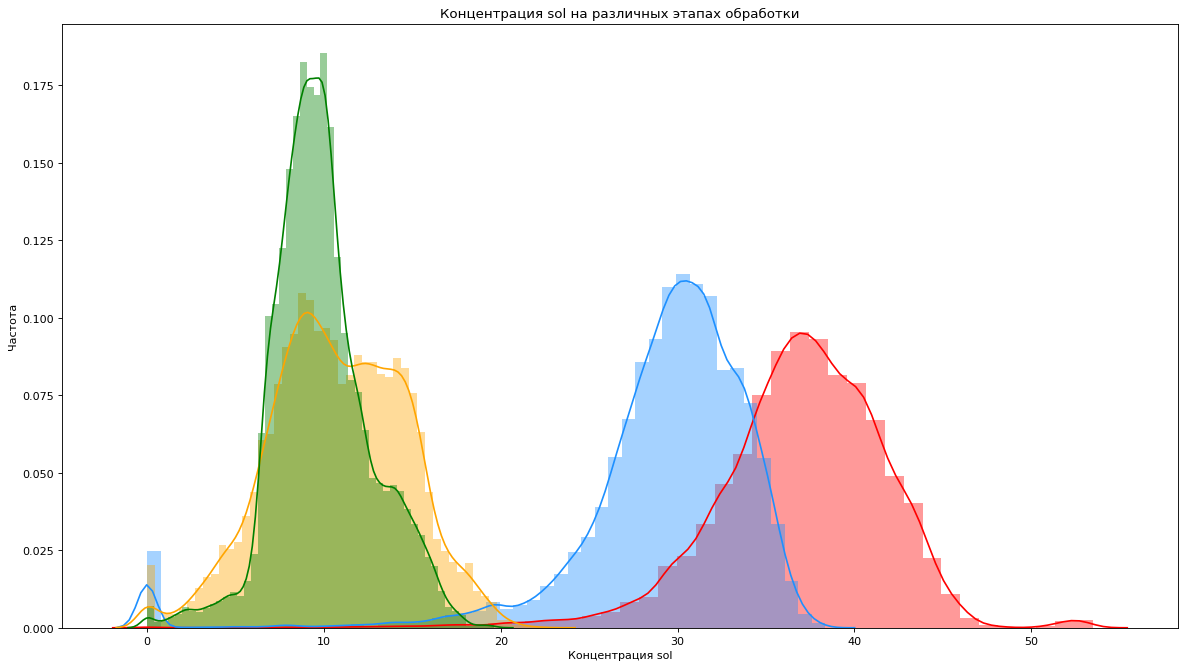

In [11]:
# теперь посторим график концентрации sol по этапам в поисках аномалий
plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(full['rougher.input.feed_sol'], color="red")
sns.distplot(full['rougher.output.concentrate_sol'], color="dodgerblue")
sns.distplot(full['primary_cleaner.output.concentrate_sol'], color="orange")
sns.distplot(full['final.output.concentrate_sol'], color="g")
plt.title('Концентрация sol на различных этапах обработки')
plt.xlabel('Концентрация sol')
plt.ylabel('Частота')
plt.show()

In [12]:
# удалим аномалии sol
train=train.drop(train.index[train['rougher.input.feed_sol']<2.5])
train=train.drop(train.index[train['rougher.output.concentrate_sol']<2.5])
train=train.drop(train.index[train['primary_cleaner.output.concentrate_sol']<2.5])
train=train.drop(train.index[train['final.output.concentrate_sol']<2.5])


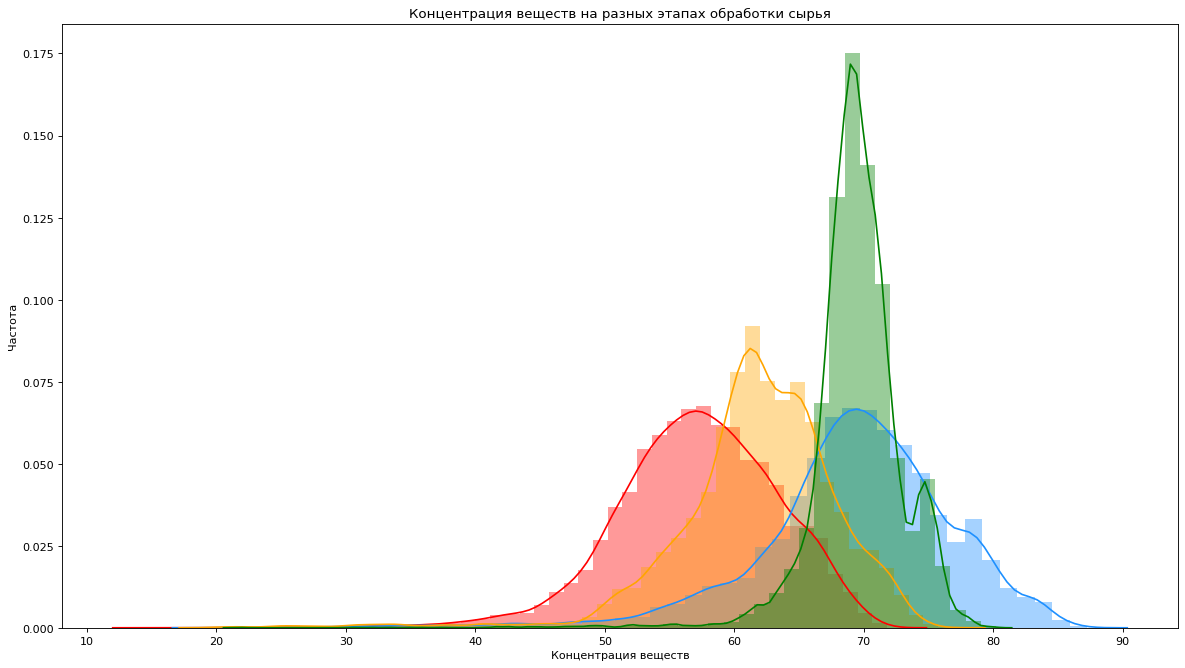

In [13]:
# еще раз посмотрим на распределение (без аномалий)
sum_feed=(train['rougher.input.feed_pb']+
                            train['rougher.input.feed_au']+
                            train['rougher.input.feed_ag']+
                            train['rougher.input.feed_sol'])
sum_rougher=(train['rougher.output.concentrate_pb']+
                            train['rougher.output.concentrate_au']+
                            train['rougher.output.concentrate_ag']+
                            train['rougher.output.concentrate_sol'])
sum_primary_cleaner=(train['primary_cleaner.output.concentrate_pb']+
                            train['primary_cleaner.output.concentrate_au']+
                            train['primary_cleaner.output.concentrate_ag']+
                            train['primary_cleaner.output.concentrate_sol'])
sum_final=(train['final.output.concentrate_pb']+
                            train['final.output.concentrate_au']+
                            train['final.output.concentrate_ag']+
                            train['final.output.concentrate_sol'])                                 




plt.figure(figsize=(18,10), dpi= 80)
sns.distplot(sum_feed, color="red")
sns.distplot(sum_rougher, color="dodgerblue", label="sum_rougher")
sns.distplot(sum_primary_cleaner, color="orange", label="sum_primary_cleaner")
sns.distplot(sum_final, color="g", label="sum_final")
plt.title('Концентрация веществ на разных этапах обработки сырья')
plt.xlabel('Концентрация веществ')
plt.ylabel('Частота')
plt.show()

# 4. Построение модели<a id='4'>
[Функция для вычисления итоговой sMAPE▼](#4.1) [Оглавление▲▲](#heading)

# Функция для вычисления итоговой sMAPE<a id='4.1'>
[Обучение моделей и оценка их качества▼](#4.2) [Оглавление▲▲](#heading)

In [14]:
# создадим функцию для расчета smape
def calc_smape(y_true, y_pred):
    smape=(abs(y_true-y_pred)/((abs(y_true)+abs(y_pred))/2)*100).mean()
    return smape
    

# Обучение моделей и оценка их качества<a id='4.2'>
[Вывод▼](#5) [Оглавление▲▲](#heading)

In [15]:
# оставим в обучающей выборке только столбцы, имеющиеся в тестовой выборке 
train = train[test.columns]

# добавим из полной выборки в обучающую и в тестовую целевые признаки
target_full=full[['date', 'final.output.recovery', 'rougher.output.recovery']]
train=train.merge(target_full, on='date')
test=test.merge(target_full, on='date')

# удалим столбец с датой
train=train.drop('date', axis=1)
test=test.drop('date', axis=1)

In [16]:
train.shape, test.shape

((9871, 54), (5077, 54))

In [17]:
# выделим признаки и цели
x=train.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
x_test=test.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)

y_rougher=train['rougher.output.recovery']
y_final=train['final.output.recovery']


y_rougher_test=test['rougher.output.recovery']
y_final_test=test['final.output.recovery']


# масштабируем числовые признаки для линейной регрессии
scaler=StandardScaler()
scaler.fit(x)
x_scaled=scaler.transform(x)
x_scaled_test=scaler.transform(x_test)


In [18]:
# обучим линейную регрессию
lr = LinearRegression()
smape_score = make_scorer(calc_smape) 
score_lr_rougher=(cross_val_score(lr, x_scaled, y_rougher, scoring=smape_score, cv=5)).mean()
score_lr_final=(cross_val_score(lr, x_scaled, y_final, scoring=smape_score, cv=5)).mean()

result_lr=0.25 * score_lr_rougher + 0.75 * score_lr_final
print(result_lr)

8.29377402702458


In [19]:
# обучим дерево решений
tree=DecisionTreeRegressor()
score_tree_rougher=(cross_val_score(tree, x, y_rougher, scoring=smape_score, cv=5)).mean()
score_tree_final=(cross_val_score(tree, x, y_final, scoring=smape_score, cv=5)).mean()

result_tree=0.25 * score_tree_rougher + 0.75 * score_tree_final
print(result_tree)


11.95313671062976


In [20]:

%%time
# обучим случайный лес
forest=RandomForestRegressor()
score_forest_rougher=(cross_val_score(forest, x, y_rougher, scoring=smape_score, cv=5)).mean()
score_forest_final=(cross_val_score(forest, x, y_final, scoring=smape_score, cv=5)).mean()

result_forest=0.25 * score_forest_rougher + 0.75 * score_forest_final
print(result_forest)


9.05071409189505
CPU times: user 6min 19s, sys: 699 ms, total: 6min 20s
Wall time: 6min 24s


In [21]:
# проверим лучшую модель на тестовой выборке
score_lr_rougher_test=(cross_val_score(lr, x_scaled_test, y_rougher_test, scoring=smape_score, cv=5)).mean()
score_lr_final_test=(cross_val_score(lr, x_scaled_test, y_final_test, scoring=smape_score, cv=5)).mean()

result_lr_test=0.25 * score_lr_rougher_test + 0.75 * score_lr_final_test
print(result_lr_test)

9.744455163496498


In [22]:
# проверим лучшую модель на адекватность
y_rougher_median=pd.Series(y_rougher.median(), index=y_rougher.index)
y_final_median=pd.Series(y_final.median(), index=y_final.index)


score_median_rougher=calc_smape(y_rougher_test, y_rougher_median)
score_median_final=calc_smape(y_final_test, y_final_median)
result_lr_median=0.25 * score_median_rougher + 0.75 * score_median_final
print(result_lr_median)


8.43833276623923


# 5. Вывод <a id='5'>
[Оглавление▲▲](#heading)

### По итогу работы лучший результат показала линейная регрессия, хотя и она не смогла превзойти результат медианы по выборке. Плюс тестирование модели показала ее переобученность.